# Исследование компьютерных игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt 
from math import factorial
from scipy import stats as st


# импортируем необходимые для проекта библиотеки

In [2]:
data = pd.read_csv("/datasets/games.csv") # открываем файл, дав название таблице

In [3]:
data.head() # проверяем, открыв первые 5 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info() # смотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum() # смотрим на наличие пропусков в столбцах

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропущены значения в суледующих столбцах: "Наименование", "Год релиза", "Оценка критиков", "Оценка пользователей", "Рейтинг"

#### Вывод. 
Загрузили и просмотрели данные, пропуски в данных присутствуют, в дальнейшем проверим данные на  выбивающиеся значения. Названия столбцов приведем к нижнему регистру, пропуски обработаем

## Подготовка данных. 

In [6]:
data.columns = data.columns.str.lower() # приводим название стодбцов к нижнему регистру

In [7]:
data.head(3) # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [8]:
data = data.dropna(subset=['name']) # удаляем пропуски в графе "название"

In [9]:
data = data.dropna(subset=['genre']) # удаляем пропуски в графе "жанр"

In [10]:
data = data.dropna(subset=['year_of_release']) # удаляем пропуски в графе "год релиза"

Удалили пропуски в графе "Наименование" и "Жанр" из-за малого количества. всего лишь 2. Пропуски в графе "Год релиза" составляю 1.6% от общей массы данных, их тоже удаляем, так как невозможно заполнить средними или медаианными значениями.

In [11]:
data.year_of_release = data.year_of_release.astype('int32') 
# переводим занчения в графе "год релиза[" в целочисловой"]"

Изенили тип на целое число, так как год не может быть не целым 

Пропуски в столбцах "critic_score", "rating", и "user score" удалять или заполнять не будем, так как их очень много, до половины всех данных

In [12]:
data["user_score"].unique() # проверяем количество уникальных оценок пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data["user_score"].value_counts() # смотрим количество уникальных оценок

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
1.9       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В графе с оценками пользователей встречается аббревиатура tbd, которая  используется для обозначения, что некоторые детали или решения еще не установлены или не определены, и требуют дальнейшей работы или принятия решения. В данной таблице эта аббревиатура указывает на то, что рейтинг еще не определен. Таких данных довольно много  - более 14%, поэтому их удалять нельзя, а следует заменить на "nan"

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan) # меняем tbd  на nan пропущенные значения

In [15]:
data["user_score"].unique() # проверяем

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
data.user_score = data.user_score.astype('float') # меняем тип данных в графе "оценка пользователей"

In [17]:
#data["total_sales"] = data["na_sales"]+data["eu_sales"]+data["jp_sales"]+data["other_sales"] 
# добавляем столбец с суммарными продажами

In [18]:
data["total_sales"] = data[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis = 1) 
# добавляем столбец с суммарными продажами

In [19]:
data.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [20]:
data["platform"].unique() # проверяем количество уникальных платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
data["genre"].unique() # проверяем количество уникальных жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
data["name"].nunique() # проверяем количество игр

11426

In [23]:
data["rating"].value_counts() # проверяем количество игр по возрастному рейтингу

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [24]:
data['rating'] = data['rating'].fillna('Unknown') # меняем пропуски в графе "рейтинг"

Данные в графе "рейтинг" могли быть пропущены по разным причинам - игра может быть в разработке, либо рейтинг не определен по системе ESRB (Америка), в Европе - это Pegi, в Австралии ACB, России - RARS, в Японии CERO. 

В этом разделе мы по возможности удалили пропущенные значения без ущерба в потере данных, в тех столбцах, где большое количество пропусков, пока менять не стали. В графе с оценкой пользователей есть непроставленные рейтинги, эти данные заменили на пропущенные значения. Поменяли типы данных у года релиза, а также в столбце "оценка пользователей" Добавили столбец с суммарными данными по продажам.

## Исследовательский анализ данных

In [25]:
data.groupby("year_of_release")["name"].count().sort_values(ascending = False) 
# смотрим распределение релизов по годам

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

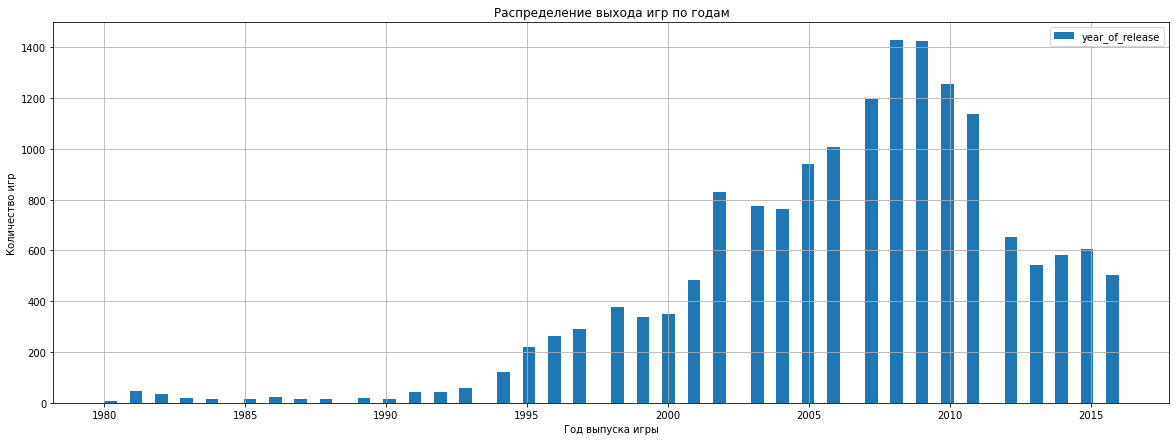

In [26]:
data.plot(kind='hist',y='year_of_release',grid=True, bins=80, figsize=(20,7),title='Распределение выхода игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

Больше всего игр было выпущено в период с 2007 по 2011 год. Резкий рост выпуска игр заметен в 2001-м году

In [27]:
data.groupby("platform")["total_sales"].sum().sort_values(ascending = False) 
# Смотрим распределение по объемам продаж у каждой платформы

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Лидирующими платформами по продажам игр за весь период являются PS2, X360, PS3, Wii, DS, PS

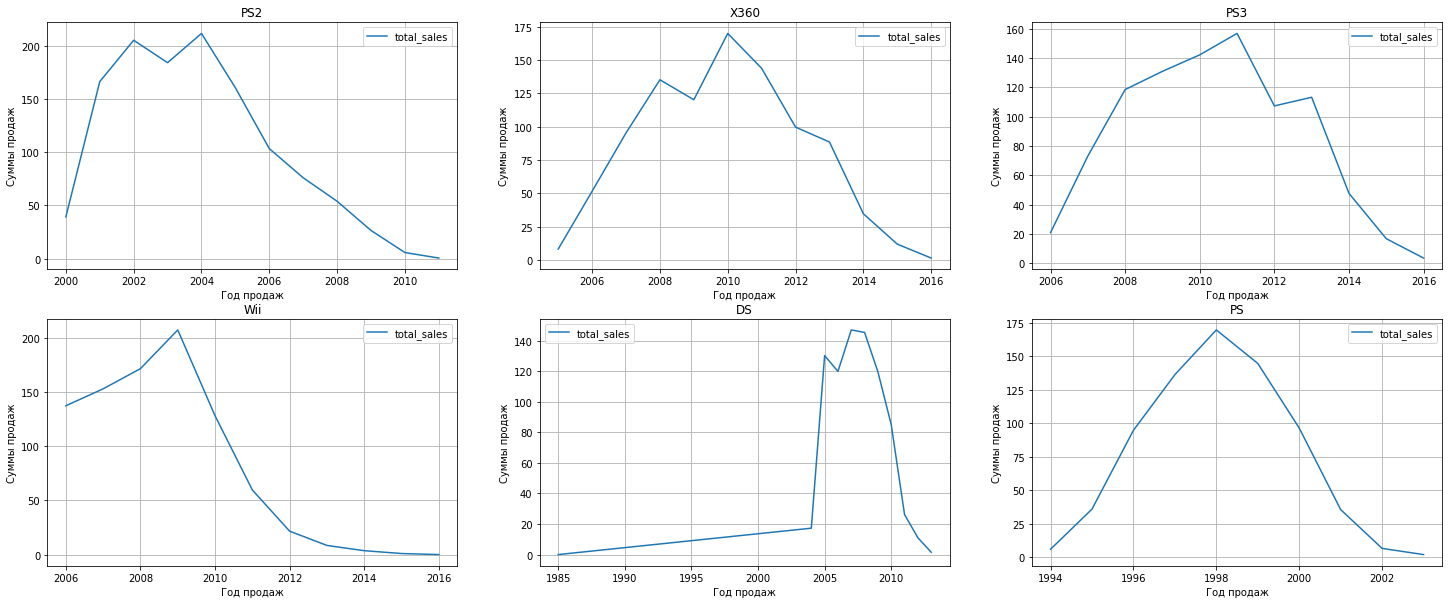

In [28]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
plt.figure(figsize=(25,10))
i = 1
for view in platforms:
    plt.subplot (2,3,i)
    data[data['platform'] == view].groupby('year_of_release')['total_sales'].sum().plot( grid = True)
    plt.xlabel('Год продаж')
    plt.ylabel('Суммы продаж')
    plt.title(view)
    plt.legend()
    i+=1

PS2 игры на этой платформе продавались в период с 2000 по 2010 год. Пик 2002-2004

X360 игры на этой платформе продавались в период с 2005 по 2015 год. Пик 2008-2010

PS3 игры на этой платформе продавались в период с 2006 по 2015 год. Пик 2010-2011

Wii игры на этой платформе продавались в период с 2006 по 2010 год. Пик 2008-2009

DS игры на этой платформе продавались в период с 2004 по 2010 год. Пик 2005-2008

PS игры на этой платформе продавались в период с 1995 по 2002 год. Пик 1998

На данном этапе исследования можно предположить, что "срок жизни" платформы составляет менее 10 лет

Чтобы определить актуальный период для 2017 года, нужно учитывать ранее полученные данные. Так как срок жизни платформы близок к 10 годам, а пик продаж составляет около 3 лет, то для планирования 2017-го года нужны данные за актуальный период, который начинается в 2013-м году

In [29]:
now_platforms = data.query('year_of_release>2012') # отбираем актуальный период времени после 2012 года

In [30]:
now_platforms.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [31]:
now_platforms.groupby("platform")["total_sales"].sum().sort_values(ascending = False) 
# Смотрим распределение по объемам продаж у каждой платформы

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

За период после 2012 года лидируют совершенно другие платформы. Здесь выделяется следующая пятерка: PS4, PS3, Xone, 3DS, X360

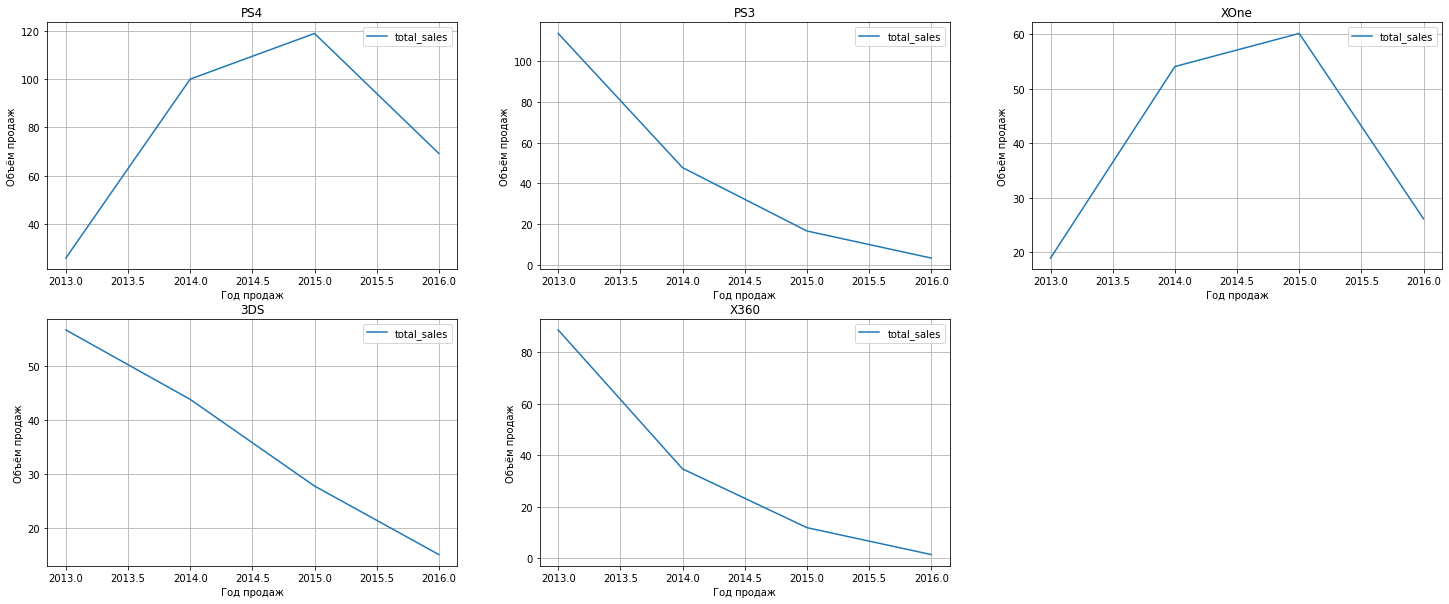

In [32]:
platforms = ['PS4', 'PS3', 'XOne','3DS', 'X360']
plt.figure(figsize=(25,10))
i = 1
for view in platforms:
    plt.subplot (2,3,i)
    now_platforms[now_platforms['platform'] == view].groupby('year_of_release')['total_sales'].sum().plot( grid = True)
    plt.xlabel('Год продаж')
    plt.ylabel('Объём продаж')
    plt.title(view)
    plt.legend()
    i+=1

На данном графике видно полное падение прожаж у трех платформ. У PS4 и XOne падение тоже заметно, но в любом случае ставку необходимо делать на них

In [33]:
actual_platforms =  now_platforms.query('platform == "XOne" or platform == "PS4"  or platform == "PS3" or platform == "3DS" or platform == "X360"')
# создаем таблицу с пятью актуальными платформами после 2012 года

In [34]:
actual_platforms.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


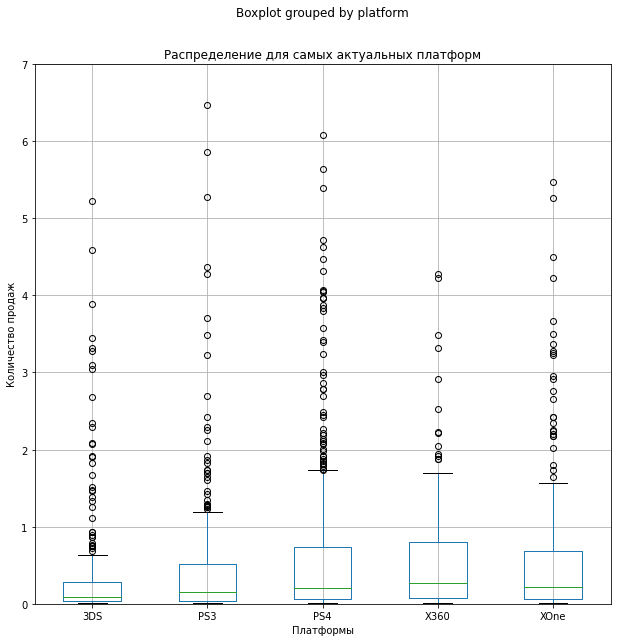

In [35]:
actual_platforms.boxplot("total_sales", "platform", figsize=(10, 10))
plt.title('Распределение для самых актуальных платформ')
plt.ylabel('Количество продаж')
plt.ylim(0, 7)
plt.xlabel("Платформы")
plt.show()
# строим ящик с усами

Из данного ящика с усами видно, что медианы примерно равны у PS4, XOne и X360. но выбросов намного больше у PS4. Также выбросов очень много у PS3 - это связано с хитами, которые выходили на разных платформах. Каждая игра в среднем приносит чуть менее 1 млн.

Сейчас посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. За одну из популярных платформ возьмем PS4.

In [36]:
populps4 =  actual_platforms.query("platform == 'PS4'") # выбираем из актуальных платформ PS4

In [37]:
populps4.head() # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [38]:
print("Корреляция между оценками пользователей PS4 и продажами", populps4['user_score'].corr(populps4['total_sales']))
# смотрим корреляцию между продажами и оценками пользователей

Корреляция между оценками пользователей PS4 и продажами -0.031957110204556376


In [39]:
print("Корреляция между оценками критиков PS4 и продажами", populps4['critic_score'].corr(populps4['total_sales']))
# смотрим корреляцию между продажами и оценками критиков

Корреляция между оценками критиков PS4 и продажами 0.40656790206178095


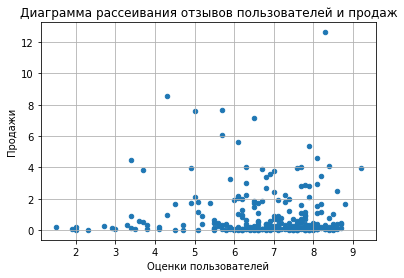

In [40]:
populps4.plot(x = "user_score", y = "total_sales", kind = "scatter", grid = True)
plt.title("Диаграмма рассеивания отзывов пользователей и продаж")
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")
plt.show() 
# строим диаграмму рассеивания

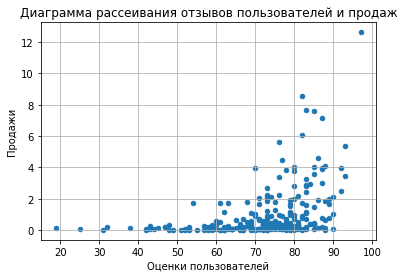

In [41]:
populps4.plot(x = "critic_score", y = "total_sales", kind = "scatter", grid = True)
plt.title("Диаграмма рассеивания отзывов пользователей и продаж")
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")
plt.show() 
# строим диаграмму рассеивания

Проверим корреляцию по XOne между оценками и продажами

In [42]:
populxone = actual_platforms.query("platform == 'XOne'") # выбираем из актуальных платформ XOne

In [43]:
print("Корреляция между оценками пользователей XOne и продажами", populxone['user_score'].corr(populxone['total_sales']))
print("Корреляция между оценками критиков XOne и продажами", populxone['critic_score'].corr(populxone['total_sales']))

Корреляция между оценками пользователей XOne и продажами -0.06892505328279414
Корреляция между оценками критиков XOne и продажами 0.4169983280084017


In [44]:
now_platforms["critic_score"].corr(now_platforms["total_sales"]) 
# проверим корреляцию между оценками критиков и продажами на актуальных платформах

0.3136995151027371

Тут можно сделать вывод, что нет корреляции между оценками пользователей и проажами игр. А вот между оценками критиков и продажами корреляция есть. Выше оценка критиков - выше продажи. Но корреляция могла бы быть  выше

Сейчас посмотрим на общее распределение игр по жанрам. 

In [45]:
now_platforms.pivot_table(index = "genre", values = "total_sales").sort_values("total_sales", ascending=False)
# сортируем актуальные платформы по жанрам и объемам продаж

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


In [46]:
data.pivot_table(index = "genre", values = "total_sales").sort_values("total_sales", ascending=False)
# сортируем продажи по жанрам за весь период

,total_sales
genre,
Platform,0.940262
Shooter,0.803519
Role-Playing,0.628683
Racing,0.590122
Sports,0.567940
Fighting,0.528865
Action,0.519057
Misc,0.459204
Simulation,0.452695


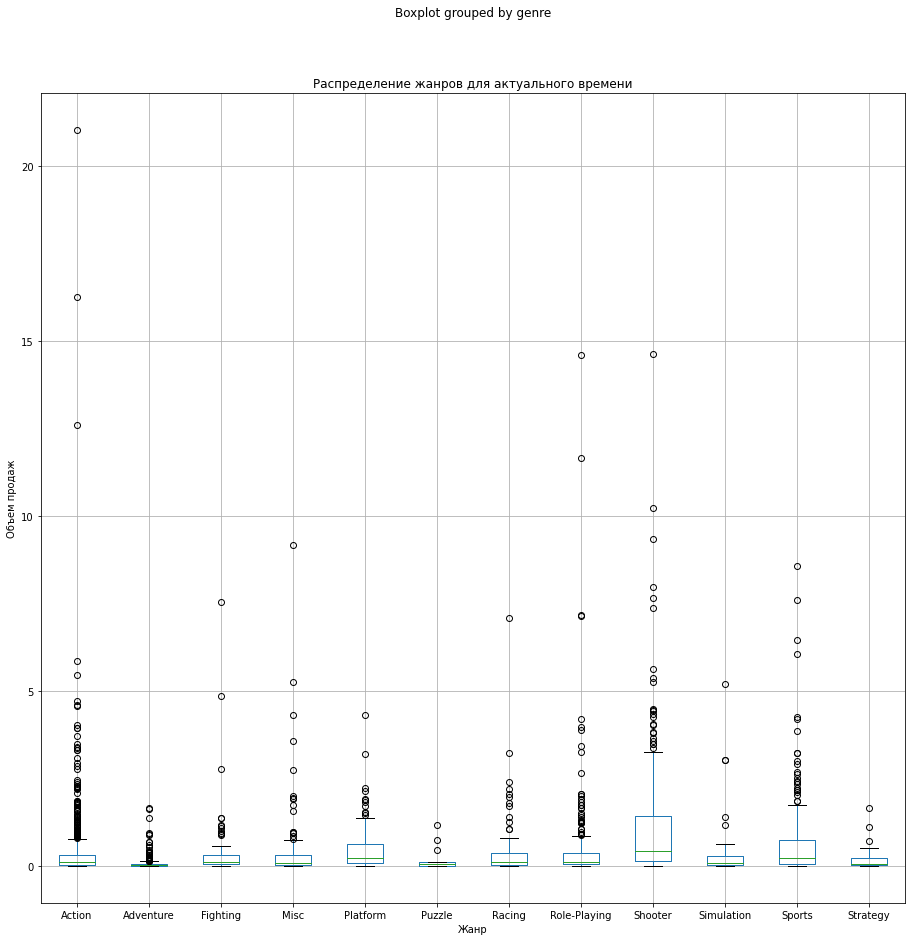

In [47]:
now_platforms[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15,15))
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.title('Распределение жанров для актуального времени')
plt.show()
# строим ящик с усами для актуальных платформ

На данный момент можно сделать вывод о популярности шутеров, спортивных игр и ролевых игр. Дынные жанры приносят больше всего прибыли.  Если смотреть на жанры за весь период продаж на первое место выбивается жанр "Платформер", ввиду того, что на в самом начале зарождения игр - все игры были двухмерными и не было современного разнообразия. В настоящее время самыми непопулярными жанрами являются пазлы, которые также являются самыми неприбыльными. 

## Портрет пользователя каждого региона 

В этом разделе определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).

In [59]:
regions = ["na_sales", "eu_sales", "jp_sales"] # берем необходимые для исследования регионы

In [60]:
now_platforms[regions].sum() # считаем данные продаж в регионах

na_sales    437.71
eu_sales    392.23
jp_sales    140.78
dtype: float64

По продажам лидирует Северная Америка, Европейский рынок немного отстает. В Японии продаж намного меньше, но это и неудивительно, так как это одна страна, а сравниваем мы ее с континентами, на которых десятки стран, в которых пользователей больше в разы.

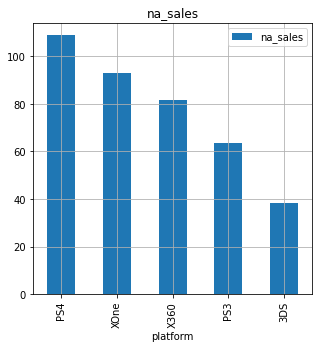

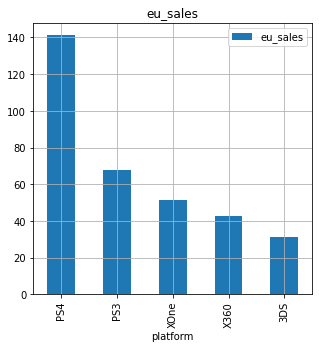

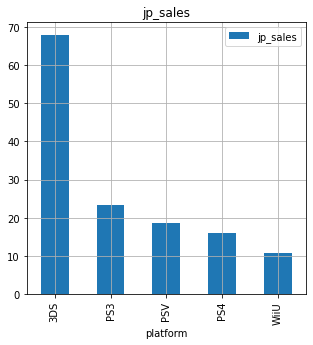

In [50]:
for view in regions:
    (now_platforms.pivot_table(index = "platform", values = view , aggfunc = "sum")
    .sort_values(view, ascending=False).head()
    .plot(kind = "bar", y = view , title = view, grid = True, figsize=(5, 5)))
plt.show()
# распределение платформ по интересующим регионам

 В разных регионах разное распределение по консолям. В Америке лидируют PS4 и XOne, в Европе PS4 и PS3, в Японии 3DS. Причем в Японии отрыв 3DS от PS3, которая стоит на втором месте очень огромный.

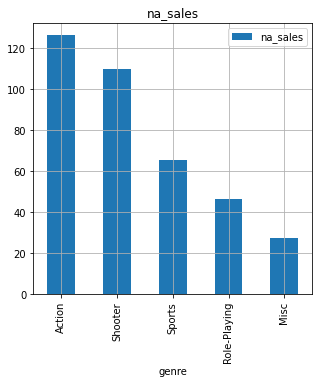

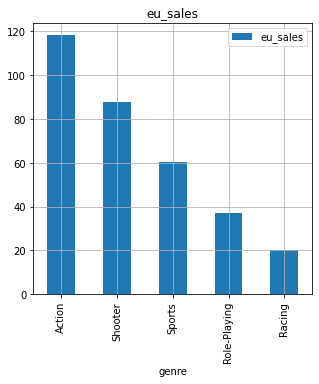

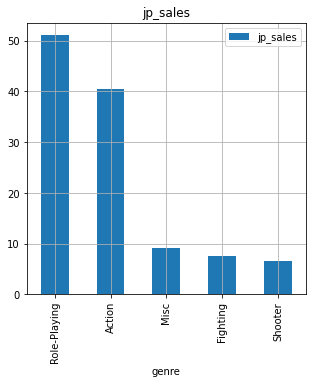

In [61]:
for view in regions:
    (now_platforms.pivot_table(index = "genre", values = view , aggfunc = "sum")
    .sort_values(view, ascending=False).head()
    .plot(kind = "bar", y = view , title = view, grid = True, figsize=(5, 5)))                
plt.show()
# распределение жанров по интересующим регионам

В Европе и Америке первые три места занимают экшены, шутеры и спортивные игры. В Японии на первых двух местах ролевые игры и экшены. Шутеры в Японии всего лищь на пятом месте. Это все скорее всего из-за того, что в Японии совершенно другая культура и рынок.

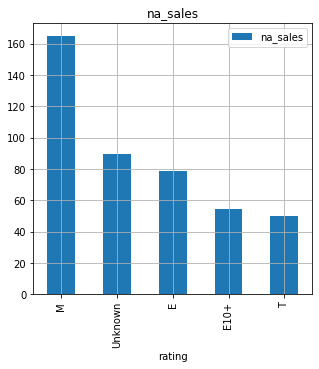

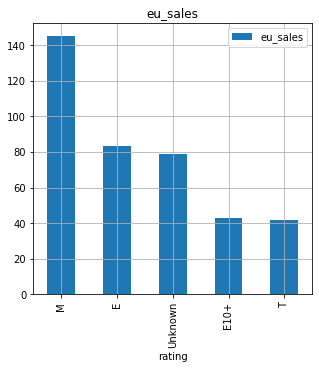

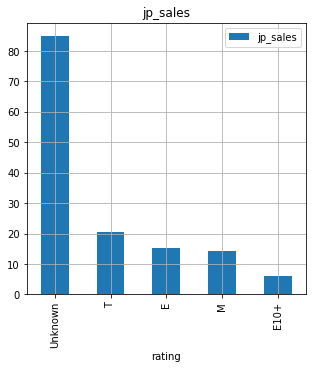

In [52]:
for view in regions:
    (now_platforms.pivot_table(index = "rating", values = view , aggfunc = "sum")
    .sort_values(view, ascending=False).head(6)
    .plot(kind = "bar", y = view , title = view, grid = True, figsize=(5, 5)))                
plt.show()
# распределение рейтинга игр по интересующим регионам

Категории

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.


«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):


«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.


«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.


«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:


«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант




Рынок Европы и Америки схож - больше всего игр в категории "старше 17" и "для всех" В Японии же больше всего игр в категории "старше 13", а на втором месте игры категории "для всех". В Японии система рейтинга CERO, (CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт. Работает с июля 2002 года) поэтому так много игр без рейтинга  ESRB 

## Проверка гипотез

Проверим следующие гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

Но: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [62]:
populpc = now_platforms.query("platform == 'PC'") # выбираем из актуальных платформ PC

In [63]:
alpha = 0.05 # уровень значимости

In [64]:
results = st.ttest_ind(populxone['user_score'], populpc['user_score'], nan_policy='omit')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.14012658403611503
Не отвергаем нулевую гипотезу


Оценки у платформ одинаковые. Гипотезу не отвергаем

Но: Средние пользовательские рейтинги в жанрах Action и Sports  одинаковые

Н1: Средние пользовательские рейтинги Action и Sports  отличаются

In [65]:
action_game = now_platforms.query("genre == 'Action'") # выбираем из актуальных платформ игры жанра Action

In [66]:
sport_game = now_platforms.query("genre == 'Sports'") # выбираем из актуальных платформ игры жанра Sports

In [67]:
results = st.ttest_ind(action_game['user_score'], sport_game['user_score'], nan_policy='omit')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.0517832389139422e-27
Отвергаем нулевую гипотезу


Оценки у жанров Action и Sports отличаются, значит нулевую гипотезу отвергаем

Оценки пользователей не заисят от платформы. На оценки пользователей влияет жанр игры.
Здась мы проверяли гипотезу о  равенстве средних двух генеральных совокупностей, потому что здесь две независимые выборки

## Общий вывод

В самом начале работы мы загрузили и просмотрели данные, выявили некоторые пропуски. Пропуски в данных, которые существенным образом не влияли на результаты – мы удалили. В дальнейшем привели к нижнему регистру названия столбцов. 
Так как в таблице были данные за 30 лет, то для планирования рекламной кампании на будущий год необходимо исследовать актуальные данные. При анализе данных мы пришли к выводу о том, что срок жизни игровой платформы составляет около 9 лет, поэтому для исследования мы отбросили данные до 2012 года.
После всего исследования мы можем сделать вывод о том, что самой популярной платформой являются PS4 и XOne. Рынок компьютерных игр в Севернй Америке и Европе очень похож, но отличается от рынка Японии. В Америке и Европе на первом месте игры в категории М – это значит игры для взрослых старше 17 лет. В Японии же своя система оценок CERO и игр по рейтингу ESRB меньше. По данному рейтингу на втором месте (после большого количества игр без Американской категории) идет категория игр Т – для игроков старше 13 лет. 
Если говорить о предпочтительных жанрах в Америке, Европе и Японии, то В Америкеи и Европе преобладают жанры Action и Shoooter, в Японии же первые два места занимают Rolle Playing и Action.
По платформам в Америке и Европе предпочтительны PS4, в Японии 3DS.
Мы сделали вывод о том, что нет корреляции между оценками игроков и продажам игр. Между оценками критиков и продажей игр корреляция есть, но нельзя сказать, что она очень большая.
Проверили две гипотезы о том, что пользовательские рейтинги платформ PС и XOne отличаются. Данная гипотеза не подтвердилась.
Вторую гипотезу о том, что пользовательские рейтинги жанров Action и Sports разные мы отвергли, сделав вывод о том, что оценки жанров Action и Sports разные.
По итогам на следующий год очень высока вероятность получить прибыль в Америке и Европе от игр жанра Action на PS4. В Японии Rolle Playing на 3DS.